In [254]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

In [255]:
model=tf.keras.models.load_model('model_e100.h5')

In [256]:
import joblib

scl=joblib.load('scaler.joblib')

c:\Python10\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [328]:
df=pd.read_csv('Final_testpool_1.csv')

In [329]:
test_pool=df.drop_duplicates(subset='Loan Identifier', keep ='first')
# test_pool=test_pool[0:1]
test_pool

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,82021,2,3.000,3.000,597000,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1477.500000,591000.00,353
7,122237728,82021,2,2.750,2.750,243000,237000.00,360,12021,32021,...,0,0,5.3,2.5,5.3,992.026070,0.00,543.125000,237000.00,353
14,122128365,82021,2,2.875,2.875,566000,560000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2348.291420,1000.00,1344.062500,561000.00,353
21,122540611,82021,1,2.250,2.250,425000,411019.10,360,122020,22021,...,0,0,5.3,2.5,5.3,1624.545935,980.90,772.500000,412000.00,352
28,122540773,82021,2,2.750,2.750,167000,154316.17,144,122020,22021,...,3,0,5.3,2.5,5.3,1362.898181,1683.83,357.500000,156000.00,136
35,123238143,82021,1,2.750,2.750,193000,191000.00,360,12021,32021,...,3,0,5.3,2.5,5.3,787.905479,1000.00,440.000000,192000.00,353
42,122237832,82021,2,2.750,2.750,236000,233268.13,360,122020,22021,...,0,0,5.3,2.5,5.3,963.449187,731.87,536.250000,234000.00,352
49,122540495,82021,2,2.500,2.500,180000,175000.00,240,12021,32021,...,3,0,5.3,2.5,5.3,953.825208,1000.00,366.666667,176000.00,233
56,122237736,82021,2,3.375,3.375,168000,164722.98,360,92020,112020,...,0,0,5.3,2.5,5.3,742.721633,279.32,464.068969,165002.30,349
63,122540517,82021,2,2.750,2.750,311000,303149.80,240,122020,22021,...,3,0,5.3,2.5,5.3,1686.137214,850.20,696.666667,304000.00,232


In [330]:
test_pool['Previous_UPB'].sum()

4175317.3899999997

In [331]:
test_pool['Current Actual UPB'].sum()

4165595.8300000005

In [332]:
test_pool['EMI'].sum()

19542.3647106

In [333]:
y=test_pool.groupby(['Loan Identifier'])['Current Actual UPB'].sum()
y

Loan Identifier
122128365    560000.00
122237728    237000.00
122237736    164722.98
122237832    233268.13
122237835    323366.39
122540495    175000.00
122540517    303149.80
122540589    344206.70
122540611    411019.10
122540664     94546.56
122540748    171000.00
122540773    154316.17
122752190    590000.00
122956092    213000.00
123238143    191000.00
Name: Current Actual UPB, dtype: float64

In [334]:
li4=list(df['Current Actual UPB'])
li4

[590000.0,
 589119.62,
 588004.21,
 586886.01,
 585765.02,
 584641.22,
 583514.61,
 237000.0,
 236596.77,
 234446.08,
 233991.32,
 233535.52,
 233078.68,
 232620.79,
 560000.0,
 559004.06,
 557995.04,
 556983.6,
 555969.74,
 554953.45,
 553934.73,
 411019.1,
 407994.18,
 406963.59,
 401931.07,
 400889.11,
 396845.2,
 395793.7,
 154316.17,
 153009.36,
 153009.36,
 150386.75,
 147996.3,
 146675.01,
 145350.69,
 191000.0,
 190945.41,
 190219.72,
 190219.72,
 189490.7,
 189124.93,
 188758.32,
 233268.13,
 232838.23,
 232407.35,
 231975.48,
 231542.62,
 231108.77,
 230673.92,
 175000.0,
 173809.61,
 172917.88,
 172024.3,
 171128.85,
 170231.54,
 169332.36,
 164722.98,
 164442.87,
 164161.98,
 163880.3,
 163597.82,
 163314.55,
 163030.48,
 303149.8,
 302158.38,
 301164.69,
 300168.72,
 299170.47,
 298169.93,
 297167.1,
 171000.0,
 170049.72,
 169399.71,
 168748.01,
 168094.61,
 167439.51,
 166782.7,
 94546.56,
 94546.56,
 94371.59,
 94020.45,
 93844.27,
 93667.69,
 93490.71,
 323366.39,
 322

In [335]:
test_pool=test_pool[test_pool['Original UPB']!=test_pool['Current Actual UPB']]

In [336]:
test_pool

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,82021,2,3.000,3.000,597000,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1477.500000,591000.00,353
7,122237728,82021,2,2.750,2.750,243000,237000.00,360,12021,32021,...,0,0,5.3,2.5,5.3,992.026070,0.00,543.125000,237000.00,353
14,122128365,82021,2,2.875,2.875,566000,560000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2348.291420,1000.00,1344.062500,561000.00,353
21,122540611,82021,1,2.250,2.250,425000,411019.10,360,122020,22021,...,0,0,5.3,2.5,5.3,1624.545935,980.90,772.500000,412000.00,352
28,122540773,82021,2,2.750,2.750,167000,154316.17,144,122020,22021,...,3,0,5.3,2.5,5.3,1362.898181,1683.83,357.500000,156000.00,136
35,123238143,82021,1,2.750,2.750,193000,191000.00,360,12021,32021,...,3,0,5.3,2.5,5.3,787.905479,1000.00,440.000000,192000.00,353
42,122237832,82021,2,2.750,2.750,236000,233268.13,360,122020,22021,...,0,0,5.3,2.5,5.3,963.449187,731.87,536.250000,234000.00,352
49,122540495,82021,2,2.500,2.500,180000,175000.00,240,12021,32021,...,3,0,5.3,2.5,5.3,953.825208,1000.00,366.666667,176000.00,233
56,122237736,82021,2,3.375,3.375,168000,164722.98,360,92020,112020,...,0,0,5.3,2.5,5.3,742.721633,279.32,464.068969,165002.30,349
63,122540517,82021,2,2.750,2.750,311000,303149.80,240,122020,22021,...,3,0,5.3,2.5,5.3,1686.137214,850.20,696.666667,304000.00,232


In [337]:
test_pool=test_pool.drop_duplicates(subset=['Loan Identifier'],keep='first')
test_pool.columns

Index(['Loan Identifier', 'Monthly Reporting Period', 'Channel',
       'Original Interest Rate', 'Current Interest Rate', 'Original UPB',
       'Current Actual UPB', 'Original Loan Term', 'Origination Date',
       'First Payment Date', 'Remaining Months To Maturity',
       'Original Loan to Value Ratio (LTV)', 'Debt-To-Income (DTI)',
       'Borrower Credit Score at Origination',
       'First Time Home Buyer Indicator', 'Loan Purpose', 'Property Type',
       'Number of Units', 'Occupancy Status',
       'Metropolitan Statistical Area (MSA)', 'Zip Code Short',
       'Interest Only Loan Indicator', 'Current Loan Delinquency Status',
       'Modification Flag', 'Zero Balance Code', 'Special Eligibility Program',
       'Property Valuation Method', 'High Balance Loan Indicator',
       'Unemployment_rate', 'Divorce_rate', 'Inflation_rate', 'EMI',
       'UPB_diff', 'Interest_Component', 'Previous_UPB', 'Remaining MFM'],
      dtype='object')

In [338]:
test_pool.drop(['Loan Identifier','EMI','UPB_diff','Interest_Component','Remaining Months To Maturity'], axis=1, inplace = True)
test_pool

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,82021,2,3.000,3.000,597000,590000.00,360,12021,32021,75,...,0,0,0,3,1,5.3,2.5,5.3,591000.00,353
7,82021,2,2.750,2.750,243000,237000.00,360,12021,32021,92,...,0,0,0,0,0,5.3,2.5,5.3,237000.00,353
14,82021,2,2.875,2.875,566000,560000.00,360,12021,32021,57,...,0,0,0,3,1,5.3,2.5,5.3,561000.00,353
21,82021,1,2.250,2.250,425000,411019.10,360,122020,22021,94,...,0,0,0,0,0,5.3,2.5,5.3,412000.00,352
28,82021,2,2.750,2.750,167000,154316.17,144,122020,22021,41,...,0,0,0,3,0,5.3,2.5,5.3,156000.00,136
35,82021,1,2.750,2.750,193000,191000.00,360,12021,32021,51,...,0,0,0,3,0,5.3,2.5,5.3,192000.00,353
42,82021,2,2.750,2.750,236000,233268.13,360,122020,22021,75,...,0,0,0,0,0,5.3,2.5,5.3,234000.00,352
49,82021,2,2.500,2.500,180000,175000.00,240,12021,32021,68,...,0,0,0,3,0,5.3,2.5,5.3,176000.00,233
56,82021,2,3.375,3.375,168000,164722.98,360,92020,112020,95,...,0,0,0,0,0,5.3,2.5,5.3,165002.30,349
63,82021,2,2.750,2.750,311000,303149.80,240,122020,22021,64,...,0,0,0,3,0,5.3,2.5,5.3,304000.00,232


In [339]:
test_pool['Modification Flag']=test_pool['Modification Flag'].fillna(2)

In [340]:
X_test_pool=test_pool.drop(['Current Actual UPB'],axis=1)

In [341]:
X_test_pool2=X_test_pool

In [342]:
y_test_pool=test_pool['Current Actual UPB']

In [343]:
def scale(value, att_index):
    scaled = (value - scl.mean_[att_index])/ scl.scale_[att_index]
    return scaled

In [344]:
def update(mrp):
    if((mrp//10000)==12):
        mrp = mrp - 110000 + 1
    else:
        mrp += 10000
    return mrp

In [345]:
Unemploy={"2000":4.0,
     "2001":4.7,
     "2002":5.8,
     "2003":6.0,
     "2004":5.5,
     "2005":5.1,
     "2006":4.6,
     "2007":4.6,
     "2008":5.8,
     "2009":9.3,
     "2010":9.6,
     "2011":8.9,
     "2012":8.1,
     "2013":7.4,
     "2014":6.2,
     "2015":5.3,
     "2016":4.9,
     "2017":4.4,
     "2018":3.9,
     "2019":3.7,
     "2020":8.1,
     "2021":5.3,
     "2022":3.6,
     "2023":3.4
     }

In [346]:
divorce={"2000":4.0,
     "2001":4.0,
     "2002":3.9,
     "2003":3.8,
     "2004":3.7,
     "2005":3.6,
     "2006":3.7,
     "2007":3.6,
     "2008":3.5,
     "2009":3.5,
     "2010":3.6,
     "2011":3.6,
     "2012":3.4,
     "2013":3.3,
     "2014":3.2,
     "2015":3.1,
     "2016":3.0,
     "2017":2.9,
     "2018":2.9,
     "2019":2.7,
     "2020":2.3,
     "2021":2.5,
     "2022":2.3,
     "2023":2.3
     }

In [347]:
inflation_data = {
    "12022": 7.5,
    "22022": 7.9,
    "32022": 8.5,
    "42022": 8.3,
    "52022": 8.6,
    "62022": 9.1,
    "72022": 8.5,
    "82022": 8.3,
    "92022": 8.2,
    "102022": 7.7,
    "112022": 7.1,
    "122022": 6.5,
    "12021": 1.4,
    "22021": 1.7,
    "32021": 2.6,
    "42021": 4.2,
    "52021": 5.0,
    "62021": 5.4,
    "72021": 5.4,
    "82021": 5.3,
    "92021": 5.4,
    "102021": 6.2,
    "112021": 6.8,
    "122021": 7.0,
    "12020": 2.5,
    "22020": 2.3,
    "32020": 1.5,
    "42020": 0.3,
    "52020": 0.1,
    "62020": 0.6,
    "72020": 1.0,
    "82020": 1.3,
    "92020": 1.4,
    "102020": 1.2,
    "112020": 1.2,
    "122020": 1.4,
    "12019": 1.6,
    "22019": 1.5,
    "32019": 1.9,
    "42019": 2.0,
    "52019": 1.8,
    "62019": 1.6,
    "72019": 1.8,
    "82019": 1.7,
    "92019": 1.7,
    "102019": 1.8,
    "112019": 2.1,
    "122019": 2.3,
    "12018": 2.1,
    "22018": 2.2,
    "32018": 2.4,
    "42018": 2.5,
    "52018": 2.8,
    "62018": 2.9,
    "72018": 2.9,
    "82018": 2.7,
    "92018": 2.3,
    "102018": 2.5,
    "112018": 2.2,
    "122018": 1.9,
    "12017": 2.5,
    "22017": 2.7,
    "32017": 2.4,
    "42017": 2.2,
    "52017": 1.9,
    "62017": 1.6,
    "72017": 1.7,
    "82017": 1.9,
    "92017": 2.2,
    "102017": 2.0,
    "112017": 2.2,
    "122017": 2.1,
    "12016": 1.4,
    "22016": 1.0,
    "32016": 0.9,
    "42016": 1.1,
    "52016": 1.0,
    "62016": 1.0,
    "72016": 0.8,
    "82016": 1.1,
    "92016": 1.5,
    "102016": 1.6,
    "112016": 1.7,
    "122016": 2.1,
    "12015": -0.1,
    "22015": 0.0,
    "32015": -0.1,
    "42015": -0.2,
    "52015": 0.0,
    "62015": 0.1,
    "72015": 0.2,
    "82015": 0.2,
    "92015": 0.0,
    "102015": 0.2,
    "112015": 0.5,
    "122015": 0.7,
    "12014": 1.6,
    "22014": 1.1,
    "32014": 1.5,
    "42014": 2.0,
    "52014": 2.1,
    "62014": 2.1,
    "72014": 2.0,
    "82014": 1.7,
    "92014": 1.7,
    "102014": 1.7,
    "112014": 1.3,
    "122014": 0.8,
    "12013": 1.6,
    "22013": 2.0,
    "32013": 1.5,
    "42013": 1.1,
    "52013": 1.4,
    "62013": 1.8,
    "72013": 2.0,
    "82013": 1.5,
    "92013": 1.2,
    "102013": 1.0,
    "112013": 1.2,
    "122013": 1.5,
    "12012": 2.9,
    "22012": 2.9,
    "32012": 2.7,
    "42012": 2.3,
    "52012": 1.7,
    "62012": 1.7,
    "72012": 1.4,
    "82012": 1.7,
    "92012": 2.0,
    "102012": 2.2,
    "112012": 1.8,
    "122012": 1.7,
    "12011": 1.6,
    "22011": 2.1,
    "32011": 2.7,
    "42011": 3.2,
    "52011": 3.6,
    "62011": 3.6,
    "72011": 3.6,
    "82011": 3.8,
    "92011": 3.9,
    "102011": 3.5,
    "112011": 3.4,
    "122011": 3.0,
    "12010": 2.6,
    "22010": 2.1,
    "32010": 2.3,
    "42010": 2.2,
    "52010": 2.0,
    "62010": 1.1,
    "72010": 1.2,
    "82010": 1.1,
    "92010": 1.1,
    "102010": 1.2,
    "112010": 1.1,
    "122010": 1.5,
    "12009": 0.0,
    "22009": 0.2,
    "32009": -0.4,
    "42009": -0.7,
    "52009": -1.3,
    "62009": -1.4,
    "72009": -2.1,
    "82009": -1.5,
    "92009": -1.3,
    "102009": -0.2,
    "112009": 1.8,
    "122009": 2.7,
    "12008": 4.3,
    "22008": 4.0,
    "32008": 4.0,
    "42008": 3.9,
    "52008": 4.2,
    "62008": 5.0,
    "72008": 5.6,
    "82008": 5.4,
    "92008": 4.9,
    "102008": 3.7,
    "112008": 1.1,
    "122008": 0.1,
    "12007": 2.1,
    "22007": 2.4,
    "32007": 2.8,
    "42007": 2.6,
    "52007": 2.7,
    "62007": 2.7,
    "72007": 2.4,
    "82007": 2.0,
    "92007": 2.8,
    "102007": 3.5,
    "112007": 4.3,
    "122007": 4.1,
    "12006": 4.0,
    "22006": 3.6,
    "32006": 3.4,
    "42006": 3.5,
    "52006": 4.2,
    "62006": 4.3,
    "72006": 4.1,
    "82006": 3.8,
    "92006": 2.1,
    "102006": 1.3,
    "112006": 2.0,
    "122006": 2.5,
    "12005": 3.0,
    "22005": 3.0,
    "32005": 3.1,
    "42005": 3.5,
    "52005": 2.8,
    "62005": 2.5,
    "72005": 3.2,
    "82005": 3.6,
    "92005": 4.7,
    "102005": 4.3,
    "112005": 3.5,
    "122005": 3.4,
    "12004": 1.9,
    "22004": 1.7,
    "32004": 1.7,
    "42004": 2.3,
    "52004": 3.1,
    "62004": 3.3,
    "72004": 3.0,
    "82004": 2.7,
    "92004": 2.5,
    "102004": 3.2,
    "112004": 3.5,
    "122004": 3.3,
    "12003": 2.6, 
    "22003": 3.0, 
    "32003": 3.0, 
    "42003": 2.2, 
    "52003": 2.1, 
    "62003": 2.1,
    "72003": 2.1, 
    "82003": 2.2, 
    "92003": 2.3, 
    "102003": 2.0, 
    "112003": 1.8, 
    "122003": 1.9,
    "12002": 1.1, 
    "22002": 1.1, 
    "32002": 1.5, 
    "42002": 1.6, 
    "52002": 1.2, 
    "62002": 1.1,
    "72002": 1.5, 
    "82002": 1.8, 
    "92002": 1.5, 
    "102002": 2.0, 
    "112002": 2.2, 
    "122002": 2.4,
    "12001": 3.7, 
    "22001": 3.5, 
    "32001": 2.9, 
    "42001": 3.3, 
    "52001": 3.6, 
    "62001": 3.2,
    "72001": 2.7, 
    "82001": 2.7, 
    "92001": 2.6, 
    "102001": 2.1, 
    "112001": 1.9, 
    "122001": 1.6,
    "12000": 2.7, 
    "22000": 3.2, 
    "32000": 3.8, 
    "42000": 3.1, 
    "52000": 3.2, 
    "62000": 3.7,
    "72000": 3.7, 
    "82000": 3.4, 
    "92000": 3.5, 
    "102000": 3.4, 
    "112000": 3.4, 
    "122000": 3.4,
    "12023": 6.4,
    "22023": 6.0,
    "32023": 5.0,
    "42023": 4.9
}

In [348]:
li2=[]

def dnn_forecast(test_pool): 
    for i in range(len(test_pool)):
        testing_x=test_pool[i:i+1]
        test_unscaled=testing_x
        testing_x=scl.transform(testing_x)

        fore=[]

        p=testing_x[0]
        pre=p[28]
        single_entry = np.expand_dims(p, axis=0)

        for i in range(7): 
            g=model.predict(single_entry)
            fore.append(g[0][0])

            print(g[0][0])

            test_unscaled['Previous_UPB']=g[0][0]
            test_unscaled['Monthly Reporting Period']=update(int(test_unscaled['Monthly Reporting Period']))
            k=str(int(test_unscaled['Monthly Reporting Period']))
            k=k[::-1]
            r=k[:4]

            r=r[::-1]
            print(r)

            if(k=="52023"):
                print("done")
                break
            
            test_unscaled['Unemployment_rate']=Unemploy[r]
            test_unscaled['Divorce_rate']=divorce[r]
            test_unscaled['Inflation_rate']=inflation_data[str(int(test_unscaled['Monthly Reporting Period']))]
            test_unscaled['Remaining MFM']=int(test_unscaled['Remaining MFM'])-1

            test_scaled=(scl.transform(test_unscaled))[0]
            single_entry = np.expand_dims(test_scaled, axis=0)

        li2.append(fore)

In [ ]:
dnn_forecast(X_test_pool)

In [350]:
li2

[[590309.56, 589616.4, 588922.75, 588228.0, 587530.9, 586849.4, 586169.0],
 [236528.52, 236061.89, 235609.9, 235170.47, 234738.52, 234308.02, 233886.56],
 [560344.0, 559686.6, 559033.1, 558381.9, 557728.4, 557088.7, 556452.6],
 [411196.66, 410392.9, 409597.44, 408807.94, 408019.5, 406875.56, 405867.75],
 [154775.27, 153543.03, 152315.22, 151088.88, 149856.92, 148583.14, 147360.64],
 [191593.52, 191192.23, 190806.11, 190432.73, 190066.86, 189681.72, 189304.25],
 [233612.52, 233230.36, 232864.2, 232509.78, 232157.47, 231586.66, 231150.23],
 [175428.81, 174866.12, 174324.48, 173800.73, 173288.06, 172778.78, 172282.03],
 [164825.12, 164647.42, 164473.08, 164301.0, 164128.94, 163954.11, 163780.4],
 [302975.66, 301948.84, 300932.38, 299922.78, 298912.8, 297748.3, 296655.94],
 [170516.64, 170043.28, 169592.53, 169161.25, 168742.72, 168329.3, 167930.06],
 [94532.52, 94059.14, 93586.586, 93118.26, 92650.61, 92091.195, 91585.625],
 [322363.44, 321728.97, 321107.34, 320496.4, 319889.28, 319086.8,

In [351]:
sum_list=[]
count = 0
for j in range (7):
    sum = 0
    for i in range(15):
        sum = sum + li2[i][count]
    sum_list.append(sum)
    count   += 1

print(sum_list)

[4165871.3359375, 4156438.765625, 4147150.9296875, 4137974.4296875, 4128826.90625, 4118558.7109375, 4108981.625]


In [352]:
currentupb = list(df['Current Actual UPB'])
monthly_cupb = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(currentupb), 7):
        sum+=currentupb[i]
    monthly_cupb.append(sum)
    start+=1

monthly_cupb

[4165595.83,
 4152590.8200000003,
 4140900.86,
 4124213.5999999996,
 4110552.63,
 4097043.82,
 4085901.8799999994]

In [353]:
previousupb = list(df['Previous_UPB'])
monthly_pupb = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(previousupb), 7):
        sum+=previousupb[i]
    monthly_pupb.append(sum)
    start+=1

monthly_pupb

[4175317.3899999997,
 4165595.83,
 4152590.8200000003,
 4140900.86,
 4124213.5999999996,
 4110552.63,
 4097043.82]

In [354]:
currentemi = list(df['EMI'])
emi = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(currentemi), 7):
        sum+=currentemi[i]
    emi.append(sum)
    start+=1

emi

[19542.3647106,
 19542.3647106,
 19542.3647106,
 19542.3647106,
 19542.3647106,
 19542.3647106,
 19542.3647106]

In [355]:
pc=df['EMI']-df['Interest_Component']

In [356]:
pc = list(pc)
pc_list = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(pc), 7):
        sum+=pc[i]
    pc_list.append(sum)
    start+=1

In [357]:
pc_list

[9758.790838724999,
 9781.025808516668,
 9810.406993933333,
 9837.542165808334,
 9874.651587683335,
 9906.491067891666,
 9936.577361641668]

In [426]:
actual_smm=[]

for i in range(7):
    k=(monthly_pupb[i]-monthly_cupb[i]-pc[i])/(monthly_pupb[i]-pc[i])
    actual_smm.append(k)

actual_smm

[0.00207990078716356,
 0.002872584756646169,
 0.002564293234433479,
 0.0037779822290324575,
 0.0030586242595757843,
 0.0030310855986194984,
 0.0024625477096900487]

In [369]:
predict_previous_upb=[]

for i in range(7):
    if i==0:
        predict_previous_upb.append(monthly_pupb[i])
    else:
        predict_previous_upb.append(sum_list[i-1])

predict_previous_upb

[4175317.3899999997,
 4165871.3359375,
 4156438.765625,
 4147150.9296875,
 4137974.4296875,
 4128826.90625,
 4118558.7109375]

In [370]:
sum_list

[4165871.3359375,
 4156438.765625,
 4147150.9296875,
 4137974.4296875,
 4128826.90625,
 4118558.7109375,
 4108981.625]

In [427]:
predicted_smm=[]

for i in range(7):
    k=(predict_previous_upb[i]-sum_list[i]-pc[i])/(predict_previous_upb[i]-pc[i])
    predicted_smm.append(k)

predicted_smm

[0.0020138999258933364,
 0.0020146309744102217,
 0.001983845031017689,
 0.0019607647358410906,
 0.0019574353004060746,
 0.0022325909839900756,
 0.002069631086403144]

In [402]:
actual_smm

[0.0020847560174877765,
 0.002881583324383304,
 0.0025715341820397378,
 0.0037932724603814863,
 0.003068791857843473,
 0.003041082289745442,
 0.0024692646227446016]

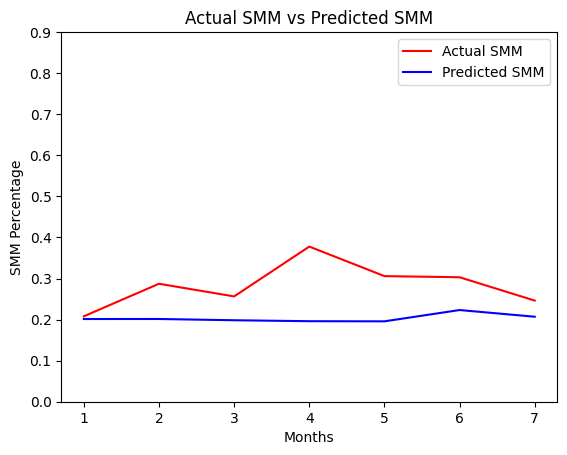

In [428]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1, 8) 

act_smm=np.asarray(actual_smm)
pred_smm=np.asarray(predicted_smm)

act_smm=act_smm*100
pred_smm=pred_smm*100

plt.plot(months, act_smm, label='Actual SMM',color='red')
plt.plot(months, pred_smm, label='Predicted SMM',color='blue')

plt.xlabel('Months')
plt.ylabel('SMM Percentage')
plt.title('Actual SMM vs Predicted SMM')

plt.yticks(np.arange(0, 1, 0.1))

plt.legend()

plt.show()


In [409]:
pred_smm

array([0.20138999, 0.2014631 , 0.1983845 , 0.19607647, 0.19574353,
       0.2232591 , 0.20696311])

In [410]:
act_smm

array([0.2084756 , 0.28815833, 0.25715342, 0.37932725, 0.30687919,
       0.30410823, 0.24692646])

In [411]:
act_smm-pred_smm

array([0.00708561, 0.08669523, 0.05876892, 0.18325077, 0.11113566,
       0.08084913, 0.03996335])

In [429]:
actual_cpr=[]
predicted_cpr=[]


for i in range(7):
    acpr=1-pow(1-act_smm[i],12)
    pcpr=1-pow(1-pred_smm[i],12)

    actual_cpr.append(acpr)
    predicted_cpr.append(pcpr)
    

In [430]:
actual_cpr

[0.9390789383695536,
 0.9828136070031726,
 0.971432840784955,
 0.9966335283137918,
 0.9874874264416101,
 0.9868785580999866,
 0.9663724742034338]

In [431]:
predicted_cpr

[0.9326997036459422,
 0.9327735945588398,
 0.9295966616055259,
 0.927125286718146,
 0.9267622893754268,
 0.9517703513769423,
 0.9381242196233405]

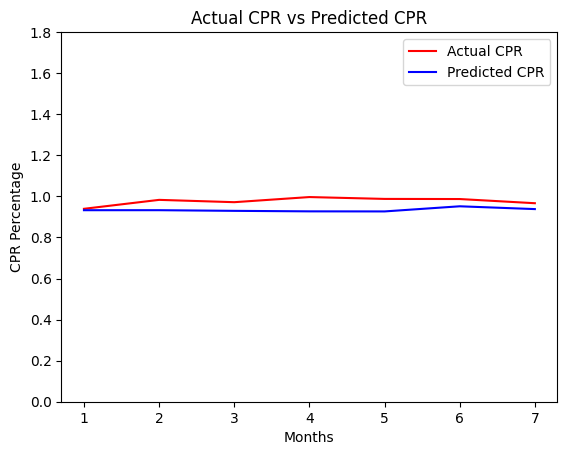

In [425]:
months = np.arange(1, 8) 

act_cpr=np.asarray(actual_cpr)
pred_cpr=np.asarray(predicted_cpr)

# act_cpr=act_cpr*100
# pred_cpr=pred_cpr*100

plt.plot(months, act_cpr, label='Actual CPR',color='red')
plt.plot(months, pred_cpr, label='Predicted CPR',color='blue')

plt.xlabel('Months')
plt.ylabel('CPR Percentage')
plt.title('Actual CPR vs Predicted CPR')

plt.yticks(np.arange(0, 2,0.2))

plt.legend()

plt.show()

In [325]:
li4

[590000.0,
 589119.62,
 588004.21,
 586886.01,
 585765.02,
 584641.22,
 583514.61,
 237000.0,
 236596.77,
 234446.08,
 233991.32,
 233535.52,
 233078.68,
 232620.79,
 560000.0,
 559004.06,
 557995.04,
 556983.6,
 555969.74,
 554953.45,
 553934.73,
 411019.1,
 407994.18,
 406963.59,
 401931.07,
 400889.11,
 396845.2,
 395793.7,
 154316.17,
 153009.36,
 153009.36,
 150386.75,
 147996.3,
 146675.01,
 145350.69,
 191000.0,
 190945.41,
 190219.72,
 190219.72,
 189490.7,
 189124.93,
 188758.32,
 233268.13,
 232838.23,
 232407.35,
 231975.48,
 231542.62,
 231108.77,
 230673.92,
 175000.0,
 173809.61,
 172917.88,
 172024.3,
 171128.85,
 170231.54,
 169332.36,
 164722.98,
 164442.87,
 164161.98,
 163880.3,
 163597.82,
 163314.55,
 163030.48,
 303149.8,
 302158.38,
 301164.69,
 300168.72,
 299170.47,
 298169.93,
 297167.1,
 171000.0,
 170049.72,
 169399.71,
 168748.01,
 168094.61,
 167439.51,
 166782.7,
 94546.56,
 94546.56,
 94371.59,
 94020.45,
 93844.27,
 93667.69,
 93490.71,
 323366.39,
 322

In [326]:
li3=[]

for i in li2:
    li3=li3+i

In [205]:
li3

[590309.56,
 589616.4,
 588922.75,
 588228.0,
 587530.9,
 586849.4,
 586169.0,
 236528.52,
 236061.89,
 235609.9,
 235170.47,
 234738.52,
 234308.02,
 233886.56,
 560344.0,
 559686.6,
 559033.1,
 558381.9,
 557728.4,
 557088.7,
 556452.6,
 411196.66,
 410392.9,
 409597.44,
 408807.94,
 408019.5,
 406875.56,
 405867.75,
 154775.27,
 153543.03,
 152315.22,
 151088.88,
 149856.92,
 148583.14,
 147360.64,
 191593.52,
 191192.23,
 190806.11,
 190432.73,
 190066.86,
 189681.72,
 189304.25,
 233612.52,
 233230.36,
 232864.2,
 232509.78,
 232157.47,
 231586.66,
 231150.23,
 175428.81,
 174866.12,
 174324.48,
 173800.73,
 173288.06,
 172778.78,
 172282.03,
 164825.12,
 164647.42,
 164473.08,
 164301.0,
 164128.94,
 163954.11,
 163780.4,
 302975.66,
 301948.84,
 300932.38,
 299922.78,
 298912.8,
 297748.3,
 296655.94,
 170516.64,
 170043.28,
 169592.53,
 169161.25,
 168742.72,
 168329.3,
 167930.06,
 94532.52,
 94059.14,
 93586.586,
 93118.26,
 92650.61,
 92091.195,
 91585.625,
 322363.44,
 3217

In [206]:
li3

105

In [218]:
li4=np.asarray(li4)
li3=np.asarray(li3)
li5=abs(li4-li3)
li5.mean()

1199.0603154761905

In [219]:
pre_upb=np.sum(li4)
cur_upb=np.sum(li3)

In [220]:
pre_upb

28876799.439999998

In [221]:
cur_upb

28963800.0

In [223]:
(cur_upb-pre_upb)/pre_upb

0.003012818653285019

In [208]:
len(li4[0:31])

31

In [209]:
test_pool[0:5]

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,82021,2,3.000,3.000,597000,590000.00,360,12021,32021,75,...,0,0,0,3,1,5.3,2.5,5.3,591000.0,353
7,82021,2,2.750,2.750,243000,237000.00,360,12021,32021,92,...,0,0,0,0,0,5.3,2.5,5.3,237000.0,353
14,82021,2,2.875,2.875,566000,560000.00,360,12021,32021,57,...,0,0,0,3,1,5.3,2.5,5.3,561000.0,353
21,82021,1,2.250,2.250,425000,411019.10,360,122020,22021,94,...,0,0,0,0,0,5.3,2.5,5.3,412000.0,352
28,82021,2,2.750,2.750,167000,154316.17,144,122020,22021,41,...,0,0,0,3,0,5.3,2.5,5.3,156000.0,136


In [210]:
(testing_x)

array([[-1.02954984,  0.84383406, -1.55350925, -1.31814191,  3.66609448,
         0.60030419, -1.61128169, -1.01986277,  0.19222231,  0.34209664,
         0.81302176, -0.42491108,  1.32517563,  0.48097901, -0.15472204,
         0.08211211, -0.53040637,  0.90130701, -0.39673819, -0.12827818,
        -0.1805408 , -0.11415215, -0.16041107, -0.15799407,  9.77825071,
        -0.33494945, -1.22110499,  0.08337639,  3.88398382,  0.96277591]])

In [211]:
testing_x[0]

array([-1.02954984,  0.84383406, -1.55350925, -1.31814191,  3.66609448,
        0.60030419, -1.61128169, -1.01986277,  0.19222231,  0.34209664,
        0.81302176, -0.42491108,  1.32517563,  0.48097901, -0.15472204,
        0.08211211, -0.53040637,  0.90130701, -0.39673819, -0.12827818,
       -0.1805408 , -0.11415215, -0.16041107, -0.15799407,  9.77825071,
       -0.33494945, -1.22110499,  0.08337639,  3.88398382,  0.96277591])

In [212]:
fore=[]

p=testing_x[0]
pre=p[28]
single_entry = np.expand_dims(p, axis=0)

In [213]:
for i in range(6): 
    # print(i)   
    g=model.predict(single_entry)
    fore.append(g[0][0])

    print(g[0][0])

    test_unscaled['Previous_UPB']=g[0][0]
    test_unscaled['Monthly Reporting Period']=update(int(test_unscaled['Monthly Reporting Period']))
    k=str(int(test_unscaled['Monthly Reporting Period']))
    k=k[::-1]
    r=k[:4]

    r=r[::-1]
    print(r)

    if(k=="52023"):
        print("done")
        break
    
    test_unscaled['Unemployment_rate']=Unemploy[r]
    test_unscaled['Divorce_rate']=divorce[r]
    test_unscaled['Inflation_rate']=inflation_data[str(int(test_unscaled['Monthly Reporting Period']))]
    test_unscaled['Remaining MFM']=int(test_unscaled['Remaining MFM'])-1

    # l=single_entry[0]
    # l[-1]=scale(l[-1]-1,29)
    # print(l[0])
    # l[0]=update(l[0])
    # print(l[0])
    
    # print(k)
    # l[25]=Unemploy[r]
    # l[25]=scale(l[25],25)
    # # l[-1]=(l[-1]-1-270.868240)/90.489321
    # # l[0]=(update(l[0])-67492.295858)/34497.797429	
    # l[28]=scale(g, scl.mean_[28], scl.scale_[28])
    # l[0]=scale(l[0],0)

    # print(test_unscaled)
    
    test_scaled=(scl.transform(test_unscaled))[0]
    single_entry = np.expand_dims(test_scaled, axis=0)

1/1 [==============================] - 0s 25ms/step
596653.2
2021
1/1 [==============================] - 0s 23ms/step
596030.1
2021
1/1 [==============================] - 0s 28ms/step
595358.56
2021
1/1 [==============================] - 0s 25ms/step
594685.25
2021
1/1 [==============================] - 0s 28ms/step
594009.0
2021
1/1 [==============================] - 0s 57ms/step
593329.4
2021


In [214]:
fore

[596653.2, 596030.1, 595358.56, 594685.25, 594009.0, 593329.4]

In [215]:
# def update(mrp):
#     new_mrp = int(mrp)
#     if((new_mrp//10000)==12):
#         new_mrp = new_mrp - 110000 + 1
#     else:
#         new_mrp += 10000
#     return new_mrp
# print(update('122002'))

In [216]:
test1_y

NameError: name 'test1_y' is not defined

In [ ]:
for i in range(len(fore)):
    print(fore[i]-test1_y[i])

-346.8125
30.125
358.5625
685.25
2009.0
2329.375


In [ ]:
# X_train_1.describe()

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),Debt-To-Income (DTI),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
count,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,...,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.00000,804139.000000,804139.000000,804139.000000,804139.000000
mean,67492.295858,1.398669,5.112216,4.983585,187677.681346,312.137781,67319.894812,66955.339365,71.578742,34.126307,...,0.051592,0.018257,0.046860,3.242918,0.010346,5.93966,3.128324,2.439492,170358.980081,270.868240
std,34497.797429,0.713811,1.361030,1.504040,111821.292224,79.729861,34307.612765,34256.668292,17.715732,11.308050,...,0.287244,0.160058,0.292056,1.543653,0.101190,1.90471,0.514733,1.920493,110003.999783,90.489321
min,12000.000000,0.000000,1.750000,0.000000,10000.000000,96.000000,11999.000000,12000.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.60000,2.300000,-2.100000,0.000000,-62.000000
25%,42002.000000,1.000000,4.000000,4.000000,104000.000000,240.000000,42001.000000,42001.000000,62.000000,26.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,4.40000,2.700000,1.400000,88485.830000,191.000000
50%,72003.000000,2.000000,4.875000,4.875000,161000.000000,360.000000,62020.000000,72000.000000,76.000000,35.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,5.30000,3.200000,2.100000,145000.000000,314.000000
75%,102002.000000,2.000000,6.125000,6.000000,248000.000000,360.000000,102000.000000,92019.000000,80.000000,42.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,8.10000,3.600000,3.000000,227768.860000,342.000000
max,122022.000000,2.000000,9.875000,9.875000,813000.000000,360.000000,122020.000000,122020.000000,97.000000,64.000000,...,2.000000,7.000000,2.000000,4.000000,1.000000,9.60000,4.000000,9.100000,813000.000000,360.000000


In [ ]:
test1=pd.read_csv('test1.csv')
test1

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,22021,2,3.0,3.0,597000.0,597000.00,360,12021,32021,...,3,1,5.3,2.5,1.7,2516.976081,0.00,1492.5,597000.00,359
1,122752190,32021,2,3.0,3.0,597000.0,596000.00,360,12021,32021,...,3,1,5.3,2.5,2.6,2516.976081,1000.00,1492.5,597000.00,358
2,122752190,42021,2,3.0,3.0,597000.0,595000.00,360,12021,32021,...,3,1,5.3,2.5,4.2,2516.976081,1000.00,1492.5,596000.00,357
3,122752190,52021,2,3.0,3.0,597000.0,594000.00,360,12021,32021,...,3,1,5.3,2.5,5.0,2516.976081,1000.00,1492.5,595000.00,356
4,122752190,62021,2,3.0,3.0,597000.0,592000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,2000.00,1492.5,594000.00,355
5,122752190,72021,2,3.0,3.0,597000.0,591000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,1000.00,1492.5,592000.00,354
6,122752190,82021,2,3.0,3.0,597000.0,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1492.5,591000.00,353
7,122752190,92021,2,3.0,3.0,597000.0,589119.62,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,880.38,1492.5,590000.00,352
8,122752190,102021,2,3.0,3.0,597000.0,588004.21,360,12021,32021,...,3,1,5.3,2.5,6.2,2516.976081,1115.41,1492.5,589119.62,351
9,122752190,112021,2,3.0,3.0,597000.0,586886.01,360,12021,32021,...,3,1,5.3,2.5,6.8,2516.976081,1118.20,1492.5,588004.21,350


In [ ]:
test1.drop(['Loan Identifier','EMI','UPB_diff','Interest_Component','Remaining Months To Maturity'], axis=1, inplace = True)
test1

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,22021,2,3.0,3.0,597000.0,597000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,1.7,597000.00,359
1,32021,2,3.0,3.0,597000.0,596000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,2.6,597000.00,358
2,42021,2,3.0,3.0,597000.0,595000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,4.2,596000.00,357
3,52021,2,3.0,3.0,597000.0,594000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.0,595000.00,356
4,62021,2,3.0,3.0,597000.0,592000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,594000.00,355
5,72021,2,3.0,3.0,597000.0,591000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,592000.00,354
6,82021,2,3.0,3.0,597000.0,590000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.3,591000.00,353
7,92021,2,3.0,3.0,597000.0,589119.62,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,590000.00,352
8,102021,2,3.0,3.0,597000.0,588004.21,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,6.2,589119.62,351
9,112021,2,3.0,3.0,597000.0,586886.01,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,6.8,588004.21,350


In [ ]:
test1_x=test1.drop(['Current Actual UPB'],axis=1)

In [ ]:
test1_y=test1['Current Actual UPB']

In [ ]:
test1_x=scl.transform(test1_x)

In [ ]:
pred=model.predict(test1_x)

1/1 [==============================] - 0s 19ms/step


In [ ]:
test1_y

0     597000.00
1     596000.00
2     595000.00
3     594000.00
4     592000.00
5     591000.00
6     590000.00
7     589119.62
8     588004.21
9     586886.01
10    585765.02
11    584641.22
12    583514.61
13    582385.19
14    581252.94
15    580117.86
16    578979.94
17    577839.18
18    576695.57
19    575549.10
20    574399.76
21    573247.55
22    572092.46
Name: Current Actual UPB, dtype: float64

In [ ]:
pred

array([[596774.4 ],
       [596653.2 ],
       [595325.6 ],
       [594324.7 ],
       [593321.9 ],
       [591314.1 ],
       [590309.5 ],
       [589305.75],
       [588424.25],
       [587306.2 ],
       [586184.06],
       [585077.25],
       [583952.9 ],
       [582826.2 ],
       [581694.5 ],
       [580561.4 ],
       [579425.94],
       [578283.75],
       [577137.6 ],
       [575989.06],
       [574836.25],
       [573680.2 ],
       [572521.3 ]], dtype=float32)

In [ ]:
mean_absolute_error(pred,test1_y)

443.084673913054

In [ ]:
for i in range(len(pred)):
    print(pred[i]-test1_y[i])

[-225.625]
[653.1875]
[325.625]
[324.6875]
[1321.875]
[314.125]
[309.5]
[186.125]
[420.0625]
[420.1875]
[419.0625]
[436.]
[438.25]
[441.]
[441.5625]
[443.5]
[446.]
[444.5625]
[442.0625]
[439.9375]
[436.5]
[432.625]
[428.875]
